# Analyze HuBERT Data

In [117]:
# Utilitiies
import numpy as np
import matplotlib.pyplot as plt
import glob 
import os

In [118]:
SEGMENTS = ["aa", "iy"]

In [119]:
hidden_representations = []
save_folder = "./data"

for segment in SEGMENTS:
    save_path = os.path.join(save_folder, f"HS_{segment}.npy")
    hidden_representations.append(
        np.load(save_path)
    )

In [120]:
# print(hidden_representations[0].shape)
# print(hidden_representations[1].shape)

(25, 1024, 138)
(25, 1024, 267)


In [121]:
# Resample same ammount
for segment_idx in range(len(SEGMENTS)):

    # TODO understand how the np.random.choice works, TODO check replace = false
    hidden_representations[segment_idx] = hidden_representations[segment_idx][:, :, np.random.choice(
        hidden_representations[segment_idx].shape[2],
        min(hidden_representations[0].shape[2], hidden_representations[1].shape[2]), replace=False)]

Goal: Create a graph where y index represents distinguishability through x (each encoder) to prove "better and better" representations

Note: at each layer we have 500, 1024 vectors for 2 segments
how do we compare them?

- average across the 500 frames at the layer  --> note we don't get the context of the values as well

In [122]:
def cohensd(x, y):
    mnx = np.mean(x)
    mny = np. mean(y)
    sdx = np.std(x)
    sdy = np.std(y)
    return ((mnx-mny) / np.sqrt((((sdx**2)+(sdy**2))/2)))

In [123]:
# num_encoders = 25
# num_frames = 500
# vector_len = 1024
# effect_sizes = np.empty((num_encoders, vector_len))
# for encoder_idx in range(num_encoders):
#     # for frame in range(num_frames):
#     #     for vector in

#     for vector_component in range(vector_len):
#         effect_sizes[encoder_idx, vector_component] = cohensd(hidden_representations[0][encoder_idx, vector_component, :],
#                                                               hidden_representations[1][encoder_idx, vector_component, :])

In [124]:
# # See how many hidden representations's vector component is "distinctive"
# num_distinctive = np.abs(effect_sizes) > 0.5
# # TODO document this
# print(effect_sizes.shape)
# print(np.prod(effect_sizes.shape))
# print(100*np.sum(num_distinctive)/np.prod(effect_sizes.shape))

In [125]:
# # axis = 1 means over rows
# distinctiveness_by_encoder = np.sum(num_distinctive, axis=1)

# plt.plot(distinctiveness_by_encoder, "-o")

(25, 1024)
25600
31.8671875


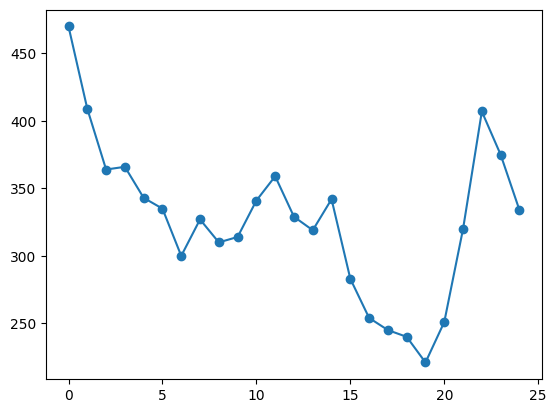

In [126]:
num_encoders = 25
num_frames = 500
vector_len = 1024
effect_sizes = np.empty((num_encoders, vector_len))
for encoder_idx in range(num_encoders):
    # for frame in range(num_frames):
    #     for vector in

    for vector_component in range(vector_len):
        effect_sizes[encoder_idx, vector_component] = cohensd(hidden_representations[0][encoder_idx, vector_component, :],
                                                              hidden_representations[1][encoder_idx, vector_component, :])

# See how many hidden representations's vector component is "distinctive"
num_distinctive = np.abs(effect_sizes) > 0.5
# TODO document this
print(effect_sizes.shape)
print(np.prod(effect_sizes.shape))
print(100*np.sum(num_distinctive)/np.prod(effect_sizes.shape))

# axis = 1 means over rows
distinctiveness_by_encoder = np.sum(num_distinctive, axis=1)

plt.plot(distinctiveness_by_encoder, "-o")